This notebook merges the data into a consistent xarray object. 

In [9]:
import xarray as xr
import rioxarray
import geopandas as gpd
from rasterio import features
import numpy as np

Starting with some key variables that will be used throughout the script. 

In [10]:
martinique_shape = True

## Elevation

In [11]:
elevation = rioxarray.open_rasterio("..\data\\raw\elevation\cop30_dem.tif")
elevation

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_40120\2233468793.py:1: SyntaxWarning: invalid escape sequence '\d'
  elevation = rioxarray.open_rasterio("..\data\\raw\elevation\cop30_dem.tif")


<xarray.DataArray (band: 1, y: 2160, x: 1800)> Size: 16MB
[3888000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 17kB 14.95 14.95 14.95 14.95 ... 14.35 14.35 14.35
  * x            (x) float64 14kB -61.25 -61.25 -61.25 ... -60.75 -60.75 -60.75
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

In [12]:
reference = elevation.copy()
reference

<xarray.DataArray (band: 1, y: 2160, x: 1800)> Size: 16MB
[3888000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 17kB 14.95 14.95 14.95 14.95 ... 14.35 14.35 14.35
  * x            (x) float64 14kB -61.25 -61.25 -61.25 ... -60.75 -60.75 -60.75
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

## Land cover

In [13]:
landcover = rioxarray.open_rasterio("..\data\\raw\ESA_worldcover\ESA_WorldCover_10m_2020_v100_N12W063\ESA_WorldCover_10m_2020_v100_N12W063_Map.tif")
#landcover.plot()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_40120\1316746003.py:1: SyntaxWarning: invalid escape sequence '\d'
  landcover = rioxarray.open_rasterio("..\data\\raw\ESA_worldcover\ESA_WorldCover_10m_2020_v100_N12W063\ESA_WorldCover_10m_2020_v100_N12W063_Map.tif")


In [14]:
buildings_vec = gpd.read_file("..\\data\\raw\OSM\\buildings.shp")
buildings_vec.head()

<>:1: SyntaxWarning: invalid escape sequence '\O'
<>:1: SyntaxWarning: invalid escape sequence '\O'
C:\Users\ggenelot\AppData\Local\Temp\ipykernel_40120\2230429923.py:1: SyntaxWarning: invalid escape sequence '\O'
  buildings_vec = gpd.read_file("..\\data\\raw\OSM\\buildings.shp")


,element,id,addr_city,addr_postc,addr_stree,addr_house,source_geo,addr_place,addr_count,addr_hou_1,addr_full,geometry
0,relation,373384,Rivière-Salée,97215,None,BP 38,None,None,None,Quartier Thoraille,None,"POLYGON ((-60.96627 14.51354, -60.96624 14.513..."
1,relation,444734,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.03895 14.63476, -61.03893 14.634..."
2,relation,444735,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.03717 14.63488, -61.03718 14.634..."
3,relation,444754,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.03955 14.63439, -61.03954 14.634..."
4,relation,543455,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.07905 14.64925, -61.07903 14.649..."


In [21]:
# Exemple : rasteriser une colonne 'classe'
shape = (reference.sizes["y"], reference.sizes["x"])
transform = reference.rio.transform()


# Extracting shapes from the building file
geom = [shapes for shapes in buildings_vec.geometry]

# Rasterize vector using the shape and coordinate system of the raster
buildings_raster = features.rasterize(geom,
                                out_shape = shape,
                                fill = 0,
                                out = None,
                                transform = transform,
                                all_touched = True,
                                default_value = 1,
                                dtype = None)

# Convertir en DataArray compatible
buildings_da = xr.DataArray(
    buildings_raster,
    dims=("y", "x"),
    coords={"x": reference.x, "y": reference.y},
    name="classe_vecteur"
)


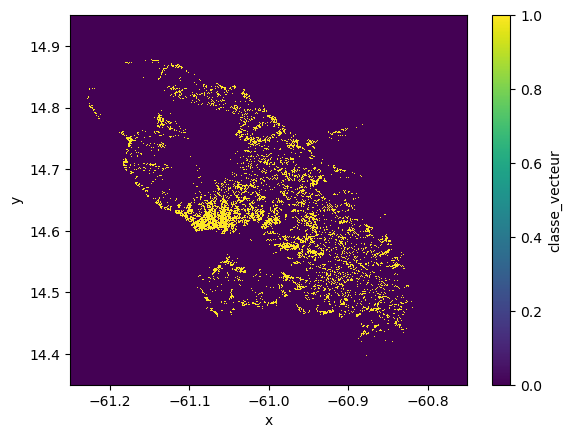

In [22]:
buildings_da.plot()